In [1]:
import torch
import utils
import networks
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from torch import nn
from torchvision import datasets, transforms

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
BATCH_SIZE = 64
LATENT_DIM = 64
Z_DIM = 16
EPOCHS = 50
%matplotlib inline

0 0.02363964356482029


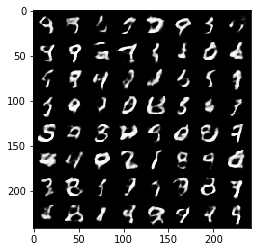

1 0.024001507088541985


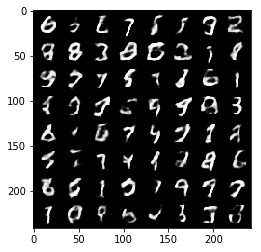

2 0.023290438577532768


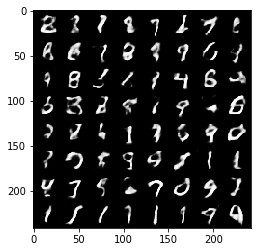

3 0.023524150252342224


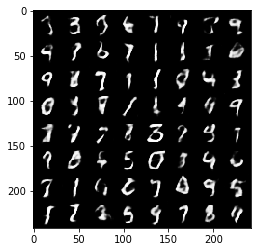

4 0.02297794446349144


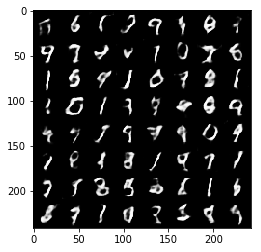

5 0.02256206050515175


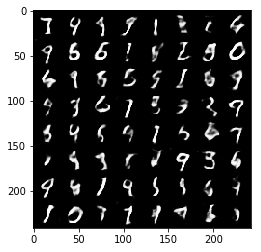

6 0.02296539954841137


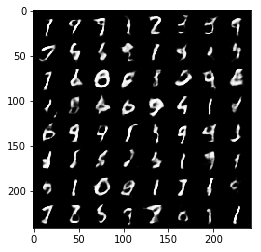

7 0.0229304451495409


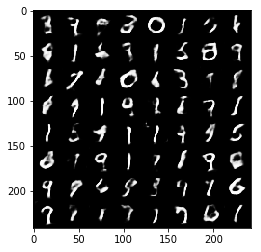

8 0.023470522835850716


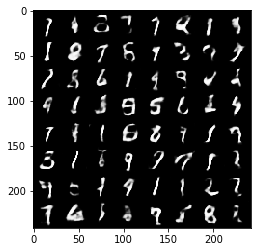

9 0.023141779005527496


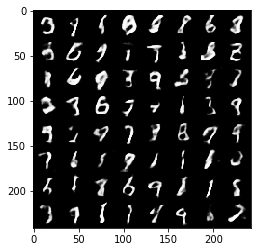

10 0.022622302174568176


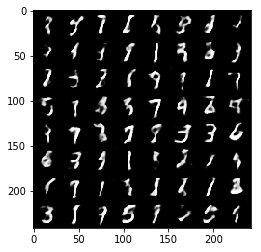

11 0.022704370319843292


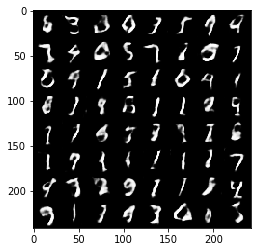

12 0.02329140342772007


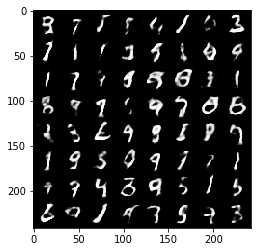

13 0.023040469735860825


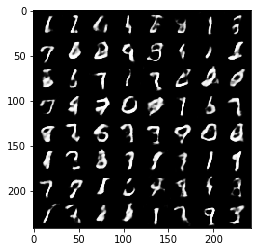

14 0.02317059598863125


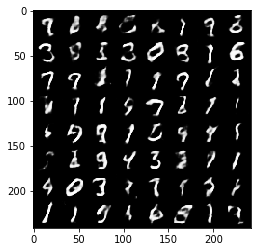

KeyboardInterrupt: 

In [3]:
# Train and test
dataloader = utils.get_glolatent_dataloader(BATCH_SIZE)
mlp = networks.MLP(Z_DIM, 128, LATENT_DIM).to(device)
G = networks.Generator().to(device)
G.load_state_dict(torch.load('glo_G.pth'))
G.eval()
optimizer = torch.optim.Adam(mlp.parameters(), 1e-4, (0.5, 0.999))

for e in range(EPOCHS):
    mlp.train()
    for lat in dataloader:
        lat = lat.to(device)
        z = torch.randn(lat.size(0), Z_DIM).to(device)
        out = mlp(z)
        lat, out = F.normalize(lat, p=2), F.normalize(out, p=2)
        out_nearest = utils.find_nearest_neighbor(lat, out)
        loss = F.mse_loss(out_nearest, lat)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(e, loss.item())
    
    with torch.no_grad():
        z = torch.randn(64, Z_DIM).to(device)
        img = G(F.normalize(mlp(z), p=2))
        img = (img * 0.5 + 0.5).cpu()
        img = torchvision.utils.make_grid(img).numpy()
        plt.imshow(img.transpose(1, 2, 0))
        plt.show()
        